In [1]:
import pandas as pd
import numpy as np

# Importing Data

In [2]:
df = pd.read_csv("https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv")

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Uncovering some flaws in the dataset

## Discovering Types and Number of Values

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
SEVERITYCODE      194673 non-null int64
X                 189339 non-null float64
Y                 189339 non-null float64
OBJECTID          194673 non-null int64
INCKEY            194673 non-null int64
COLDETKEY         194673 non-null int64
REPORTNO          194673 non-null object
STATUS            194673 non-null object
ADDRTYPE          192747 non-null object
INTKEY            65070 non-null float64
LOCATION          191996 non-null object
EXCEPTRSNCODE     84811 non-null object
EXCEPTRSNDESC     5638 non-null object
SEVERITYCODE.1    194673 non-null int64
SEVERITYDESC      194673 non-null object
COLLISIONTYPE     189769 non-null object
PERSONCOUNT       194673 non-null int64
PEDCOUNT          194673 non-null int64
PEDCYLCOUNT       194673 non-null int64
VEHCOUNT          194673 non-null int64
INCDATE           194673 non-null object
INCDTTM           194673 non-null obje

## Counting Missing Values

In [4]:
df.isna().sum()

SEVERITYCODE           0
X                   5334
Y                   5334
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

## Huge Unbalance

In [5]:
print(df['SEVERITYCODE'].value_counts())

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64


## Counting Features Values

In [6]:
print(df['WEATHER'].value_counts())

Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64


In [7]:
print(df['ROADCOND'].value_counts())

Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64


In [8]:
print(df['LIGHTCOND'].value_counts())

Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64


# Resampling

In [9]:
from sklearn.utils import resample

df_maj = df[df.SEVERITYCODE == 1]
df_min = df[df.SEVERITYCODE == 2]

df_sample = resample(df_maj, replace=False, n_samples=58188, random_state=123)
df = pd.concat([df_sample, df_min])

df['SEVERITYCODE'].value_counts()

2    58188
1    58188
Name: SEVERITYCODE, dtype: int64

# Converting

In [10]:
df = df.astype({"WEATHER":'category', "ROADCOND":'category', "LIGHTCOND":'category'})
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
25055,1,-122.292730,47.719265,29626,43684,43684,1778514,Matched,Intersection,36599.0,...,Wet,Dark - Street Lights On,NaN,5022026.0,NaN,10,Entering at angle,0,0,N
65280,1,-122.329124,47.608658,71557,84514,84514,2623093,Matched,Intersection,29926.0,...,Dry,Daylight,NaN,8235027.0,NaN,10,Entering at angle,0,0,N
86292,1,-122.292434,47.733753,94574,110476,110476,3377452,Matched,Intersection,35987.0,...,Unknown,Unknown,NaN,10323017.0,NaN,10,Entering at angle,0,0,N
155111,1,NaN,NaN,172907,222604,222884,E554578,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,11,From same direction - both going straight - bo...,0,0,N
64598,1,-122.339185,47.625594,70842,84273,84273,2898917,Matched,Block,NaN,...,Dry,Daylight,NaN,8069016.0,NaN,30,From opposite direction - all others,0,0,N


# Label Encoding

In [11]:
df["WEATHER_c"] = df["WEATHER"].cat.codes
df["ROADCOND_c"] = df["ROADCOND"].cat.codes
df["LIGHTCOND_c"] = df["LIGHTCOND"].cat.codes
Feature = df[['WEATHER','ROADCOND','LIGHTCOND','WEATHER_c','ROADCOND_c','LIGHTCOND_c']]
X = np.asarray(Feature[['WEATHER_c','ROADCOND_c','LIGHTCOND_c']])
X[0:]

array([[ 6,  8,  2],
       [ 1,  0,  5],
       [10,  7,  8],
       ...,
       [ 1,  0,  5],
       [ 1,  0,  5],
       [ 1,  0,  6]], dtype=int8)

In [12]:
y = df['SEVERITYCODE'].values
y[0:]

array([1, 1, 1, ..., 2, 2, 2])

# Modeling

## Normalizing Data

In [13]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 1.15236718,  1.52797946, -1.21648407],
       [-0.67488   , -0.67084969,  0.42978835],
       [ 2.61416492,  1.25312582,  2.07606076],
       ...,
       [-0.67488   , -0.67084969,  0.42978835],
       [-0.67488   , -0.67084969,  0.42978835],
       [-0.67488   , -0.67084969,  0.97854582]])

## Splitting Data

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print('Test set shape: ', X_test.shape, y_test.shape)
print('Training set shape: ', X_train.shape, y_train.shape)

Test set shape:  (34913, 3) (34913,)
Training set shape:  (81463, 3) (81463,)


## Building Models

### KNN

In [15]:
from sklearn.neighbors import KNeighborsClassifier
k = 24
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh_pred = neigh.predict(X_test)
neigh_pred[0:]

array([2, 1, 2, ..., 1, 1, 1])

### KNN Results

In [16]:
from sklearn.metrics import f1_score, jaccard_similarity_score, log_loss
print("F1-Score of KNN is : ", f1_score(y_test, neigh_pred, average='macro'))
print("Jaccard Score of KNN is : ", jaccard_similarity_score(y_test, neigh_pred))

F1-Score of KNN is :  0.5056455410169037
Jaccard Score of KNN is :  0.5206083693753043


### Decision Tree

In [17]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion="entropy", max_depth = 7)
dt.fit(X_train, y_train)
pt = dt.predict(X_test)
pt[0:]

array([2, 2, 2, ..., 2, 2, 1])

### Decision Tree Results

In [18]:
print("F1-Score of Decision Tree is : ", f1_score(y_test, pt, average='macro'))
print("Jaccard Score of Decision Tree is : ", jaccard_similarity_score(y_test, pt))

F1-Score of Decision Tree is :  0.542498614383236
Jaccard Score of Decision Tree is :  0.5632858820496663


### Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train, y_train)
LRpred = LR.predict(X_test)
LRprob = LR.predict_proba(X_test)
LRpred[0:]

array([2, 2, 2, ..., 1, 2, 1])

### Logistic Regression Results

In [20]:
print("F1-Score of Logistic Regression is : ", f1_score(y_test, LRpred, average='macro'))
print("Jaccard Score of Logistic Regression is : ", jaccard_similarity_score(y_test, LRpred))
print("LogLoss of Logistic Regression is : ", log_loss(y_test, LRprob))

F1-Score of Logistic Regression is :  0.5190831572964161
Jaccard Score of Logistic Regression is :  0.5338412625669522
LogLoss of Logistic Regression is :  0.6835463268902823


In [21]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 6261 11149]
 [ 5126 12377]]


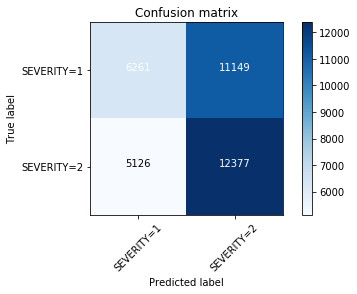

In [22]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, LRpred, labels=[1,2])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['SEVERITY=1','SEVERITY=2'],normalize= False,  title='Confusion matrix')

In [23]:
print (classification_report(y_test, LRpred))

              precision    recall  f1-score   support

           1       0.55      0.36      0.43     17410
           2       0.53      0.71      0.60     17503

   micro avg       0.53      0.53      0.53     34913
   macro avg       0.54      0.53      0.52     34913
weighted avg       0.54      0.53      0.52     34913

